### Global Average Tutorial

##### For this tutorial we will be using CMIP6 data to construct a global average graph of the top of atmosphere temperature over time

#### __Step 1. Install and Import Packages__

##### Let's start in the terminal and install "__cfTime__" which allows us to read our NetCDF files more efficiently

##### Install these packages if not already installed

Great! The needed packages for our time series graph are installed in the terminal, lets quickly import them into our jupiter python notebook¶

In [20]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

##### What are we installing and importing exactly?
- ##### Pandas is a data manipulation and analysis library that will be used to provide data structures like DataFrame
- ##### Matplotlib is a plotting library that will be used to plot maps and geospatial data
- ##### Xarray can read and write NetCDF files

#### __Step 2. Find path to your NetCDF file__
- ##### The download of a NetCDF file off the ESGF website was shown previously in tutorial previously shown
- ##### We’ll use the xr.open_dataset() function from xarray to open the NetCDF file.
- ##### This function reads the file and loads it into an xarray.Dataset object and allows for easy manipulation and analysis of the data.

In [35]:
data = xr.open_dataset('/Users/fletcherhoz/Downloads/ttop_AERmon_CNRM-CM6-1_historical_r13i1p1f2_gr_185001-201412.nc')

##### _HINT- if you ever need to find a file path name grab the downloaded file off of your finder and drag it into your terminal_
- ##### The terminal will spit out the name of where to find the file
- ##### Copy and paste that name in xr.open_dataset to open the file !!

#### __Step 3. Print our NetCDF file__
- ##### Use the print() function
- ##### file is labeled "data"

In [36]:
print(data)

<xarray.Dataset>
Dimensions:      (lat: 128, lon: 256, time: 1980, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    ttop         (time, lat, lon) float32 ...
Attributes: (12/52)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2019-05-13T13:53:55Z
    description:            CMIP6 historical
    title:                  CNRM-CM6-1 model output prepared for CMIP6 / CMIP...
    activity_id:            CMIP
    contact:                contact.cmip@meteo.fr
    ...                     ...
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    par

#### We print the dataset because it ...
- ##### Helps us understand its structure, dimensions, coordinates, and data variables
- ##### Provides a clear picture of what the data looks like and what we have to work with
- ##### Allows us to verify that the necessary variables (e.g., ttop for temperature) are present in the dataset 
- ##### Check if the dataset covers the required time range and geographical region
##### __For creating a regional average plot, we need to know the dimensions and the coordinates associated with these dimensions__ 
##### Lets detail exactly what is in our data.
#### Dimensions:
- ##### __lat: 128__ _This means there are 128 latitude points_
- ##### __lon: 256__ _This means there are 256 longitude points_
- ##### __time: 1980__ _This indicates there are 1,980 time steps_
- ##### __axis_nbounds: 2__ _This is another dimension used, for bounds_
#### Coordinates:
- ##### __Latitude (lat):___ -88.93, -87.54, -86.14, ..., 86.14, 87.54, 88.93
- ##### _These are some of the latitude values, starting from -88.93 and going up to 88.93_
- ##### __Longitude (lon):__ 0.0, 1.406, 2.812, ..., 354.4, 355.8, 357.2, 358.6
- ##### _These are some longitude values, ranging from 0.0 to 358.6 degrees_
##### __These coordinates covers the _entire planet___ That is common for CMIP6 files so you can choose any location desired
- ##### __Time (time):__ 1850-01-16, ..., 2014-12-16
- ##### _These are some of the time points, from January 16, 1850, to December 16, 2014_
#### Data Variables:
- ##### __time_bounds:__ It shows when each time point starts and ends. This helps to understand the time periods covered.
- ##### __ttop:__ This variable stores temperature values for each combination of time, latitude, and longitude.
#### Attributes: 
- ##### It's a CMIP6 historical climate model (CNRM-CM6-1), created on May 13, 2019, following CF-1.7 standards
- ##### The contact email for more info is provided
- ##### Technical commits and a tracking ID are also included
##### There is more information provided however is not helpful for our Regional Average Graph

#### __Step 4: Choose the 'ttop' variable from our data__
- ##### In climate data analysis, you often work with specific variables. Here, 'ttop' represents the top of atmosphere temperature, which is the variable we want to analyze.
- #####  By using data('ttop'), we extract the variable named 'ttop'.

In [25]:
ttop = data['ttop']

#### __Step 5: Calculate the Global Annual Mean Temperature__
- ##### To plot a regional average graph we have to calculate the global average. This removes regional variations and focuses on the overall trend.
- ##### To do so we average the temperature data over all latitudes and longitudes using .mean(dim=['lat', 'lon']).
- ##### This gives us a global mean temperature for each time interval.
- ##### Since we want to find the annual average we need to group the data by year and calculate the mean for each year using .groupby('time.year').mean()
- ##### The annual_mean variable now holds the average global temperature for each year, which can be used to observe long-term trends.

In [38]:
annual_mean = ttop.mean(dim=['lat', 'lon']).groupby('time.year').mean()

#### __Step 6: Calculate the average base line of the histroical mean__
- ##### Calculating the mean temperature over 1850 to 2014 helps compare current temperatures against this trend line.
- ##### We use the .sel() function to slice the data for the years 1850 to 2014, and then .mean() to calculate the average over this period.
- ##### The historical_mean now contains the average global temperature for the period 1850-2014
- ##### The specific Net CDF File you downloaded you portray the desired varible 

In [39]:
historical_mean = annual_mean.sel(year=slice(1850, 2014)).mean()

#### __Step 7: Convert Temperatures to Celsius__
- ##### Temperature data in climate studies is often stored in Kelvin, but Celsius is more commonly used and easier to interpret for most people.
- ##### Converting the data to Celsius makes it more accessible.
- ##### To convert from Kelvin to Celsius, subtract 273.15 from the temperature values. This conversion is applied to both the annual mean and the historical mean

In [40]:
annual_mean_celsius = annual_mean - 273.15
historical_mean_celsius = historical_mean - 273.15

#### __Step 8: Now Let's Plot!__
- ##### We plot regional average graphs to clearly show how the Earth's temperature has changed and how current temperatures compare to the historical mean. 
- ##### It is a great visualization of long term trends
##### Let's break down plotting into concise steps
#### Set Up the Plot:
- ##### Start by creating a figure and axis using plt.subplots().
- ##### This function is used to create a figure (fig) and a set of subplots (ax).
- ##### The figure is the overall window or page that contains the plot(s), and the axes are the actual plotting areas where data will be visualized.
- ##### figsize=(14, 7) is the specifies the size of the figure in inches. 
- ##### This sets up the space where your data will be plotted.
#### Plot Annual Temperatures:
- ##### This is the coding for the line graph which clearly shows how the global average temperature changes year by year. 
- ##### ax.plot(): This function plots data on the specified axes. It creates a line graph by connecting data points with straight lines.
- ##### annual_mean.year: This is the data for the x-axis, representing the years. xarray automatically extracts the year from the time dimension.
- ##### annual_mean_celsius: This is the data for the y-axis, representing the global average temperature in Celsius for each year.
- ##### label='Annual Avg Temperature': The label argument is used for the legend, identifying what this line represents.
- ##### color='blue': This sets the color of the line to blue, which is a common choice for representing temperature data in visualizations.
#### Plot Trend Line:
- ##### Add a horizontal line to represent the historical mean temperature.
- ##### This line helps visually compare annual temperatures to the baseline average from 1850-2014.
- ##### ax.axhline(): This function adds a horizontal line across the plot at a specified y-coordinate. It's used here to represent the historical mean temperature as a reference.
- ##### y=historical_mean_celsius: The y-coordinate of the line is set to the historical mean temperature, so the line will appear at the level of the historical mean on the y-axis.
- ##### color='gray': The line color is set to gray, which contrasts with the blue line of the annual temperatures but remains subtle.
- ##### linestyle='--': This sets the line style to dashed, which visually differentiates the historical mean from the solid line of the annual data.
- ##### label=f'1850-2014 Mean: The label is used in the legend to describe this line as the "1850-2014 Mean," followed by the actual mean temperature value in Celsius
#### Add Labels, Title, and Legend:
- ##### Use ax.set_title(), ax.set_xlabel(), and ax.set_ylabel() to add a title and labels to your plot. Finally, ax.legend() adds a legend to differentiate between the plotted lines.
#### Show the Plot!
- ##### Last step! plt.show()renders the plot and opens a window (or displays inline, depending on your environment) showing the final visualization.

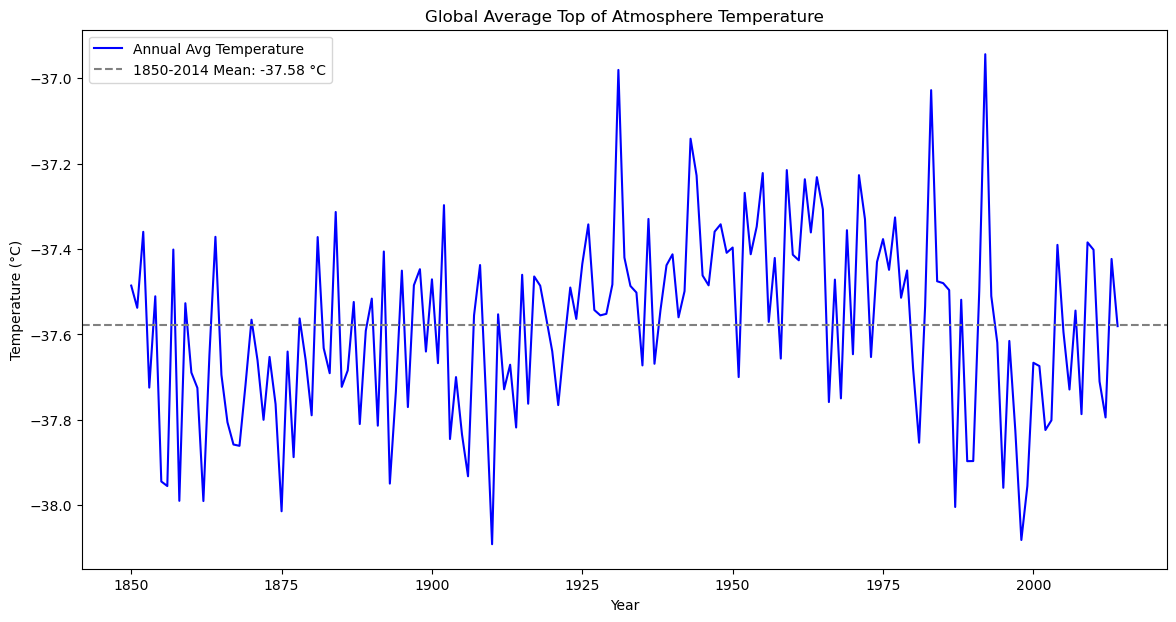

In [41]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(annual_mean.year, annual_mean_celsius, label='Annual Avg Temperature', color='blue')
ax.axhline(y=historical_mean_celsius, color='gray', linestyle='--', label=f'1850-2014 Mean: {historical_mean_celsius.values:.2f} °C')
ax.set_title('Global Average Top of Atmosphere Temperature')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')
ax.legend()
plt.show()

Next lets look at the 

regional data - 

Anaomaly 